In [27]:
import numpy as np
import random
import pandas as pd
from pprint import pprint
from collections import Counter
from tqdm import tqdm

# Загрузка описаний карт

In [28]:
data = pd.read_csv('elf.csv', header=None, names=['name', 'color', 'comp1', 'comp2', 'add', 'sets'])
data.sets = data.sets.apply(lambda x: x.lower().split(', '))
data['set_n'] = data.sets.apply(lambda x: len(x))
data

,name,color,comp1,comp2,add,sets,set_n
0,Щит и меч,Синий,Металл и электричество,Огонь,1.0,[война],1
1,Металлические солдатики,Зеленый,Металл и электричество,Вода,1.0,[война],1
2,Спейсмарин,Синий,Металл и электричество,Огонь,1.0,[война],1
3,Робот-трансформер,Зеленый,Металл и электричество,Вода,NaN,"[война, транспорт]",2
4,Танк,Зеленый,Металл и электричество,Огонь,NaN,"[война, транспорт]",2
5,Волшебная лампа (с синим джинном),Синий,Магия,Воздух,NaN,[древности],1
6,Венец из перьев (индейский),Зеленый,Магия,Воздух,NaN,[древности],1
7,Древние песочные часы,Зеленый,Дерево и нитки,Воздух,NaN,[древности],1
8,Золотая волшебная палочка,Зеленый,Магия,Воздух,NaN,[древности],1
9,Сапоги-скороходы,Красный,Магия,Огонь,NaN,"[древности, транспорт]",2


# Подсчёт очков

Тестируем вариации.

* `sets_scores` — это количество очков, получаемых за сет из 0, 1, 2, 3, 4, 5... карт одного сета
* `set_maximum` — число карт в сете, начиная с которого ПО не прибавляются
* `color_scores` — это количество очков, получаемых за максимум цветов для 0, 1, 2, 3, 4, 5... карт
* `bonus_bonus` — ПО за каждую бонусную карту

In [29]:
# sets_scores = [0, 1, 3, 5, 8, 8, 8, 8, 8]
# set_maximum = 4
# color_scores = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]
# bonus_bonus = 2

In [30]:
# sets_scores = [0, 1, 3, 5, 9, 9, 9, 9, 9]
# set_maximum = 4
# color_scores = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]
# bonus_bonus = 1

In [31]:
sets_scores = [0, 1, 3, 6, 9, 12, 12, 12, 12]
set_maximum = 5
color_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
bonus_bonus = 1

In [32]:
def score_player(player):
    
#     print('Карты игрока:')
#     pprint(player)
    
    #
    # ПО за сеты
    #
    set_score = 0
    player_sets = dict()
    
#     print()
#     print('Все сеты карт игрока:')
#     pprint(data[data.name.isin(player)].sort_values(by='set_n')['sets'].values.tolist())
    
    #
    # рассмотрим каждый сет на каждой карте игрока
    #
    for sets in data[data.name.isin(player)].sort_values(by='set_n')['sets'].values.tolist():
        #
        # если он один, то выбор очевиден
        # 
        if len(sets) == 1:
            player_sets[sets[0]] = player_sets.get(sets[0], 0) + 1
        #
        # если сетов два, то смотрим, что выгоднее в данный момент
        # "жадный" подсчёт очков
        #
        else:
            if sets[0] in player_sets and player_sets[sets[0]] < set_maximum:
                player_sets[sets[0]] += 1
            elif sets[1] in player_sets and player_sets[sets[1]] < set_maximum:
                player_sets[sets[1]] += 1
            else:
                player_sets[sets[0]] = player_sets.get(sets[0], 0) + 1
    
#     print()
#     print('Выбранные сеты для игрока:')
#     print(player_sets)
    for k, v in player_sets.items():
        set_score += sets_scores[v]
    
    #
    # ПО за цвета
    #
    player_colors = {'Красный': 0, 'Синий': 0, 'Зеленый': 0}
    for color in data[data.name.isin(player)]['color'].values.tolist():
        if color == '-':
            player_colors['Красный'] += 1
            player_colors['Синий'] += 1
            player_colors['Зеленый'] += 1
        else:
            player_colors[color] += 1
    
#     print()
#     print('Цвета карт игрока:')
#     print(player_colors)
    color_score = color_scores[max(player_colors.values())]
    
    bonus_score = 0
    for add in data[data.name.isin(player)]['add'].values.tolist():
        if not pd.isnull(add):
            bonus_score += bonus_bonus
    
#     print()
#     print('Бонусные карты:')
#     print(bonus_score)
    
    return set_score, color_score, bonus_score

# Стандартные действия игроков

In [33]:
def get_set_priority(player, n=1):
    cards = player_cards[player]
    pcard_sets = Counter()
    for card in cards:
        pcards = set(data[data.name == card].sets.values[0])
        pcard_sets.update(pcards)
    common = pcard_sets.most_common()
    if len(common) >= n:
        return common[n - 1][0]
    return None

In [34]:
def get_color_priority(player, n=1):
    cards = player_cards[player]
    pcard_colors = Counter()
    for card in cards:
        pcards = [data[data.name == card].color.values[0]]
        pcard_colors.update(pcards)
    common = pcard_colors.most_common()
    if len(common) >= n:
        return common[n - 1][0]
    return None

In [35]:
def find_card(available, set_type=None, color_type=None, bonus=None):
    for i, card in enumerate(available):
        if set_type is not None:
            if set_type in set(data[data.name == card].sets.values[0]):
                return i, card
        if color_type is not None:
            if color_type == data[data.name == card].color.values[0]:
                return i, card
        if bonus is not None:
            if not pd.isnull(data[data.name == card])['add'].values[0]:
                return i, card
    return None, None

# Играем много партий

In [48]:
game_number = 500

In [50]:
deck_count = [-1, -1, 8, 10, 12]

number_of_players = 4
deck_count = deck_count[number_of_players]

player_priorities = [
    # ['set', 'bonus', 'color', 'any'],
    # ['color', 'bonus', 'set', 'any'],
    # ['bonus', 'color', 'set', 'any'],
    ['set', 'set', 'bonus'],
    ['color', 'color', 'bonus'],
    ['bonus', 'bonus', 'color'],
    ['set', 'color', 'bonus'],
]

# Вероятности того, что игроки могут что-то разыграть
player_probs = [0.5, 0.5, 0.5]


# Результаты тестов
games_result_data = pd.DataFrame(columns=['player_number', 'sets', 'colors', 'bonuses', 'total', 'win'])

for game in tqdm(range(game_number)):
    # print('Игра', game + 1)
    
    # Перемешиваем колоду
    deck = data.sample(n=deck_count*3+number_of_players)
    deck1 = deck[0:deck_count]
    deck2 = deck[deck_count:deck_count*2]
    deck3 = deck[deck_count*2:deck_count*3]
    bonus_cards = deck[deck_count*3:]
    decks = [deck1.name.values.tolist(), deck2.name.values.tolist(), deck3.name.values.tolist()]
    
    # Создаём игроков
    player_cards = [[] for x in range(number_of_players)]
    player_probs = [0.5] * number_of_players

    game_phase = 1
    shuffle = False
    
    #
    # =============================================
    # ИГРА НАЧИНАЕТСЯ
    # =============================================
    #
    while game_phase <= 2:
        for player in range(number_of_players):
            
            # Проверка того, что одна из колод закончилась
            for d in decks:
                if len(d) == 0:
                    # print('=============== Конец фазы ===============')
                    game_phase += 1
                    shuffle = True
                    break

            # Если колода зокончилась во второй раз, то наступает конец игры
            if game_phase > 2:
                # print('=============== Конец игры ===============')
                break

            # Перетасовка карт, если такая необходимость есть
            if shuffle:
                shuffle = False
                # print('=============== Перетасовка карт ===============')
                # print()
                cards = set(decks[0]) | set(decks[1]) | set(decks[2])
                cards = list(cards)
                random.shuffle(cards)
                deck_count_phase2 = int((len(cards)) / 3)
                if deck_count_phase2 < 1:
                    game_round = 2
                    break
                decks = [
                    cards[0:deck_count_phase2], 
                    cards[deck_count_phase2:deck_count_phase2*2], 
                    cards[deck_count_phase2*2:]
                ]
                # pprint(decks)

            current_deck = [decks[0][0], decks[1][0], decks[2][0]]

            # Имитируем взятие карты ингредиента игроком
            player_probs[player] += 0.2

            for priority in player_priorities[player]:

                if priority == 'set' and player_probs[player] * random.random() > 0.5:
                    player_probs[player] -= 0.5
                    set_type = get_set_priority(player, 1)
                    # print(player_cards[player])
                    # print(set_type)
                    i, card = find_card(current_deck, set_type)
                    # print(i, card)
                    if i is None:
                        i = random.randint(0, 2)
                    if i is not None:
                        # print(i)
                        # print(decks)
                        card = decks[i].pop(0)
                        player_cards[player].append(card)
                        # print('Выбрана карта:', card)
                        continue

                if priority == 'set' and player_probs[player] * random.random() > 0.5:
                    player_probs[player] -= 0.5
                    set_type = get_set_priority(player, 2)
                    # print(players[player])
                    # print(set_type)
                    i, card = find_card(current_deck, set_type)
                    if i is None:
                        i = random.randint(0, 2)
                    if i is not None:
                        # print(i)
                        # print(decks)
                        card = decks[i].pop(0)
                        player_cards[player].append(card)
                        # print('Выбрана карта:', card)
                        continue

                if priority == 'color' and player_probs[player] * random.random() > 0.5:
                    player_probs[player] -= 0.5
                    color_type = get_color_priority(player, 1)

                    # print(players[player])
                    # print(set_type)
                    i, card = find_card(current_deck, color_type=color_type)
                    if i is None:
                        i = random.randint(0, 2)
                    if i is not None:
                        # print(i)
                        # print(decks)
                        card = decks[i].pop(0)
                        player_cards[player].append(card)
                        # print('Выбрана карта:', card)
                        continue

                if priority == 'color' and player_probs[player] * random.random() > 0.5:
                    player_probs[player] -= 0.5
                    color_type = get_color_priority(player, 2)
                    # print(players[player])
                    # print(set_type)
                    i, card = find_card(current_deck, color_type=color_type)
                    if i is None:
                        i = random.randint(0, 2)
                    if i is not None:
                        # print(i)
                        # print(decks)
                        card = decks[i].pop(0)
                        player_cards[player].append(card)
                        # print('Выбрана карта:', card)
                        continue

                if priority == 'bonus' and player_probs[player] * random.random() > 0.5:
                    player_probs[player] -= 0.5
                    # print(players[player])
                    # print(set_type)
                    i, card = find_card(current_deck, bonus=True)
                    if i is None:
                        i = random.randint(0, 2)
                    if i is not None:
                        # print(i)
                        # print(decks)
                        card = decks[i].pop(0)
                        player_cards[player].append(card)
                        # print('Выбрана карта:', card)
                        continue
                        
    #
    # =============================================
    # ИГРА ЗАКОНЧЕНА, ПОДСЧËТ ОЧКОВ
    # =============================================
    #
                
    # Подсчитаем ПО для каждого игрока
    winner_score = 0
    for i, player in enumerate(player_cards):
        s, c, b = score_player(player)
        t = s + c + b
        if t > winner_score:
            winner_score = t
        
    # Занесём результаты в таблицу
    for i, player in enumerate(player_cards):
        s, c, b = score_player(player)
        t = s + c + b
        games_result_data = games_result_data.append(
                             {'player_number': i + 1, 'sets': s, 'colors': c, 
                              'bonuses': b, 'total': t, 
                              'win': 1 if winner_score == t else 0}, ignore_index=True)

100%|██████████| 500/500 [00:56<00:00,  8.82it/s]


In [51]:
games_result_data = games_result_data.astype(dtype='float')
games_result_data.player_number = games_result_data.player_number.astype(dtype='int')
games_result_data.win = games_result_data.win.astype(dtype='int')

# Анализ результатов игр

In [52]:
pprint(player_priorities)

[['set', 'set', 'bonus'],
 ['color', 'color', 'bonus'],
 ['bonus', 'bonus', 'color'],
 ['set', 'color', 'bonus']]


In [53]:
games_result_data

,player_number,sets,colors,bonuses,total,win
0,1,14.0,6.0,0.0,20.0,1
1,2,11.0,4.0,4.0,19.0,0
2,3,11.0,4.0,4.0,19.0,0
3,4,13.0,5.0,2.0,20.0,1
4,1,14.0,5.0,1.0,20.0,1
...,...,...,...,...,...,...
1995,4,16.0,6.0,1.0,23.0,1
1996,1,12.0,3.0,1.0,16.0,0
1997,2,13.0,6.0,1.0,20.0,1
1998,3,10.0,4.0,4.0,18.0,0


In [54]:
games_result_data.describe()

,player_number,sets,colors,bonuses,total,win
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,2.500000,12.128000,4.468500,1.99050,18.587000,0.311500
std,1.118314,2.052492,0.961494,1.29238,2.546895,0.463222
min,1.000000,6.000000,3.000000,0.00000,11.000000,0.000000
25%,1.750000,11.000000,4.000000,1.00000,17.000000,0.000000
50%,2.500000,12.000000,4.000000,2.00000,19.000000,0.000000
75%,3.250000,13.000000,5.000000,3.00000,20.000000,1.000000
max,4.000000,19.000000,8.000000,7.00000,29.000000,1.000000


### Статистика по первому игроку

In [55]:
games_result_data[games_result_data.player_number == 1].describe()

,player_number,sets,colors,bonuses,total,win
count,500.0,500.00000,500.000000,500.000000,500.000000,500.000000
mean,1.0,13.19200,4.436000,1.580000,19.208000,0.460000
std,0.0,2.15137,0.952743,1.079783,2.656096,0.498897
min,1.0,7.00000,3.000000,0.000000,11.000000,0.000000
25%,1.0,12.00000,4.000000,1.000000,17.000000,0.000000
50%,1.0,13.00000,4.000000,1.500000,19.000000,0.000000
75%,1.0,15.00000,5.000000,2.000000,21.000000,1.000000
max,1.0,19.00000,8.000000,5.000000,26.000000,1.000000


### Статистика по второму игроку

In [56]:
games_result_data[games_result_data.player_number == 2].describe()

,player_number,sets,colors,bonuses,total,win
count,500.0,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.0,11.954000,4.800000,1.754000,18.508000,0.280000
std,0.0,1.850062,1.046035,1.039059,2.434294,0.449449
min,2.0,6.000000,3.000000,0.000000,11.000000,0.000000
25%,2.0,11.000000,4.000000,1.000000,17.000000,0.000000
50%,2.0,12.000000,5.000000,2.000000,18.000000,0.000000
75%,2.0,13.000000,5.000000,2.000000,20.000000,1.000000
max,2.0,18.000000,8.000000,5.000000,27.000000,1.000000


### Статистика по третьему игроку

In [57]:
games_result_data[games_result_data.player_number == 3].describe()

,player_number,sets,colors,bonuses,total,win
count,500.0,500.000000,500.000000,500.00000,500.000000,500.000000
mean,3.0,11.418000,4.284000,3.15600,18.858000,0.322000
std,0.0,1.837942,0.892714,1.24046,2.560263,0.467711
min,3.0,7.000000,3.000000,0.00000,12.000000,0.000000
25%,3.0,10.000000,4.000000,2.00000,17.000000,0.000000
50%,3.0,11.000000,4.000000,3.00000,19.000000,0.000000
75%,3.0,13.000000,5.000000,4.00000,21.000000,1.000000
max,3.0,18.000000,7.000000,7.00000,29.000000,1.000000


### Статистика по четвёртому игроку

In [58]:
games_result_data[games_result_data.player_number == 4].describe()

,player_number,sets,colors,bonuses,total,win
count,500.0,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.0,11.948000,4.354000,1.472000,17.774000,0.184000
std,0.0,1.935145,0.863815,1.025338,2.306852,0.387872
min,4.0,7.000000,3.000000,0.000000,11.000000,0.000000
25%,4.0,11.000000,4.000000,1.000000,16.000000,0.000000
50%,4.0,12.000000,4.000000,1.000000,18.000000,0.000000
75%,4.0,13.000000,5.000000,2.000000,19.000000,0.000000
max,4.0,18.000000,7.000000,5.000000,25.000000,1.000000


# Графики

In [59]:
import seaborn as sns
sns.set(style = 'whitegrid')

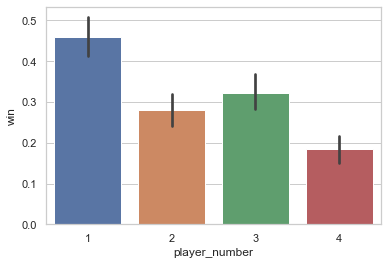

In [60]:
ax = sns.barplot(x='player_number', y='win', data=games_result_data)

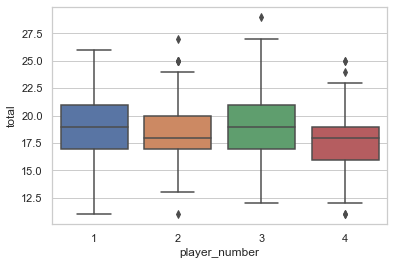

In [61]:
ax = sns.boxplot(x='player_number', y='total', data=games_result_data)